## NetworkX

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Undirected graph
G = nx.Graph()

Nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [44]:
G.clear()

# Add nodes and edges
G.add_node("A")
G.add_nodes_from(["B", "C"]) # Can add a list of nodes
G.add_nodes_from("DE") # This ass two nodes D and E

G.add_edge("A", "C")
G.add_edges_from([("B", "D"), ("B", "C")])
G.add_edges_from(["CD", "DE"]) # This add an edge ("C", "D")

In [45]:
# Can set the position of the nodes
pos = {
    "A": (1, 5),
    "B": (4.5, 6.6),
    "C": (3.6, 1.4),
    "D": (5.8, 3.5),
    "E": (7.9, 3.6),
}

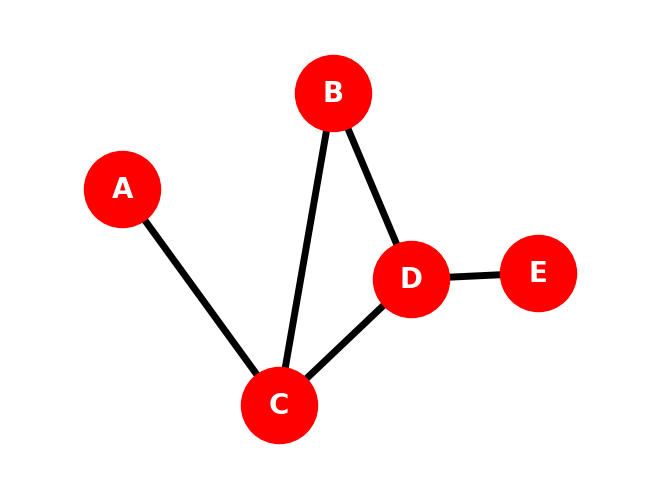

In [46]:
# Keep the graph same.
seed = 0
random.seed(seed)
np.random.seed(seed)

nx.draw(G, pos=pos, with_labels=True, node_color="red", node_size=3000, font_color="white", 
        font_size=20, font_weight="bold", width=5)
plt.margins(0.2)
plt.show()

### Attributed Graph
Graph, Nodes and edges can have attributes.

In [47]:
# Undirected graph and add an attribute
G = nx.Graph()
G.graph["Name"] = "My Graph"

# Add nodes and edges with attributes, the names and values are arbitrary
# G.add_node("A", Age=19, Gender="F")
G.add_nodes_from([
    ("A", {"Age":19, "Gender":"F"}),
    ("B", {"Age":18, "Gender":"M"}),
    ("C", {"Age":22, "Gender":"M"}),
    ("D", {"Age":21, "Gender":"M"}),
    ("E", {"Age":20, "Gender":"F"})
])

# G.add_edge("A", "C", weight=1)
G.add_edges_from([
    ("A", "C", {"weight":1}),
    ("B", "C", {"weight":0.3}),
    ("B", "D", {"weight":0.5}),
    ("C", "D", {"weight":0.7}),
    ("D", "E", {"weight":1.2})
])

In [50]:
# Get the attribute of graph, node and edge
G.graph, G.nodes["A"], G.edges[("A", "C")]

({'Name': 'My Graph'}, {'Age': 19, 'Gender': 'F'}, {'weight': 1})

In [51]:
# iterate through nodes and print attributes (data=True)
for node in G.nodes(data=True):
    print(node)

('A', {'Age': 19, 'Gender': 'F'})
('B', {'Age': 18, 'Gender': 'M'})
('C', {'Age': 22, 'Gender': 'M'})
('D', {'Age': 21, 'Gender': 'M'})
('E', {'Age': 20, 'Gender': 'F'})


In [52]:
# iterate through edges and print attributes (data=True)
for edge in G.edges(data=True):
    print(edge)

('A', 'C', {'weight': 1})
('B', 'C', {'weight': 0.3})
('B', 'D', {'weight': 0.5})
('C', 'D', {'weight': 0.7})
('D', 'E', {'weight': 1.2})


### Degree and neighbors

In [53]:
print(f"# Nodes: {G.number_of_nodes()}")
print(f"# Edges: {G.number_of_edges()}")

# Nodes: 5
# Edges: 5


In [54]:
# Node degree
for node in G.nodes:
    print(f"Degree({node}) = {G.degree(node)}")

Degree(A) = 1
Degree(B) = 2
Degree(C) = 3
Degree(D) = 3
Degree(E) = 1


In [55]:
# Get nieghbors
for node in G.nodes:
    neighbor_list = [n for n in G.neighbors(node)]
    print(f"Neighbors({node}): {neighbor_list}")

Neighbors(A): ['C']
Neighbors(B): ['C', 'D']
Neighbors(C): ['A', 'B', 'D']
Neighbors(D): ['B', 'C', 'E']
Neighbors(E): ['D']


## Draw graph with attributes

In [56]:
# Use G.nodes to get the attributes of node
for node, attr in G.nodes(data=True):
    print(f"{node}, {attr}")

A, {'Age': 19, 'Gender': 'F'}
B, {'Age': 18, 'Gender': 'M'}
C, {'Age': 22, 'Gender': 'M'}
D, {'Age': 21, 'Gender': 'M'}
E, {'Age': 20, 'Gender': 'F'}


In [57]:
# Create a dictionary for drawing attribute labels
node_labels = {n:(d["Age"], d["Gender"]) for n, d in G.nodes(data=True)}
node_labels

{'A': (19, 'F'),
 'B': (18, 'M'),
 'C': (22, 'M'),
 'D': (21, 'M'),
 'E': (20, 'F')}

In [58]:
# set edge labels
edge_labels = {(u,v): d["weight"] for u,v,d in G.edges(data=True)}
edge_labels

{('A', 'C'): 1,
 ('B', 'C'): 0.3,
 ('B', 'D'): 0.5,
 ('C', 'D'): 0.7,
 ('D', 'E'): 1.2}

In [59]:
# set the coordinates of the node attributes
pos_node_attributes = {}
for node, (x,y) in pos.items():
    pos_node_attributes[node] = (x, y-0.9)
pos_node_attributes

{'A': (1, 4.1),
 'B': (4.5, 5.699999999999999),
 'C': (3.6, 0.4999999999999999),
 'D': (5.8, 2.6),
 'E': (7.9, 2.7)}

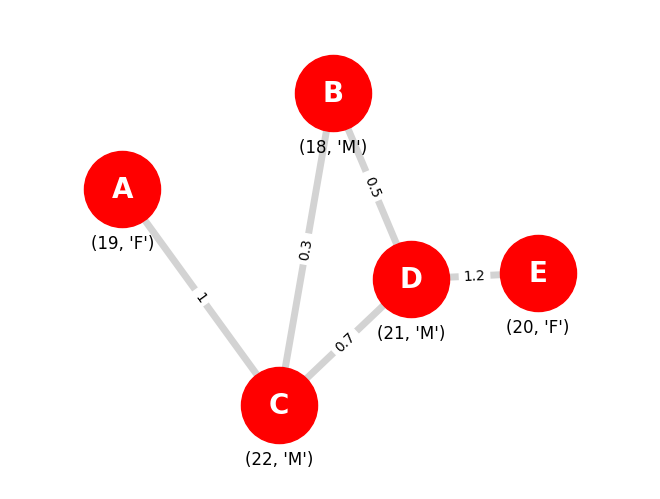

In [60]:
seed = 0
random.seed(seed)
np.random.seed(seed)

# draw graph
nx.draw(G, pos=pos, with_labels=True, node_color="red", node_size=3000, font_color="white", 
        font_size=20, font_weight="bold", width=5, edge_color="lightgray")

# draw labels
nx.draw_networkx_labels(G, pos=pos_node_attributes, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, label_pos=0.5)

plt.margins(0.2)
plt.show()

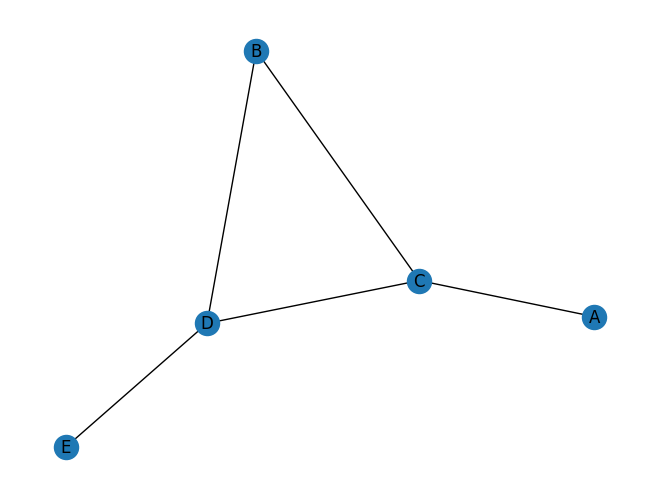

In [65]:
DiG = nx.DiGraph()
DiG.add_nodes_from(["C", "D", "E", "F", "G", "A", "B"])
DiG.add_edges_from([
    ("C", "C", {"times": 1}),
    ("C", "G", {"times": 2}),
    ("G", "A", {"times": 4}),
    ("A", "G", {"times": 2})
])

nx.draw(G, with_labels=True)